<a href="https://colab.research.google.com/github/juancuevas-ops/analisis-molecular-covid19/blob/main/SECUENCIACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!apt-get install pymol

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pymol is already the newest version (2.5.0+dfsg-1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [3]:
!cat /usr/share/pymol/data/pymol/matrices/BLOSUM62

#  Matrix made by matblas from blosum62.iij
#  * column uses minimum score
#  BLOSUM Clustered Scoring Matrix in 1/2 Bit Units
#  Blocks Database = /data/blocks_5.0/blocks.dat
#  Cluster Percentage: >= 62
#  Entropy =   0.6979, Expected =  -0.5209
   A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V  B  Z  X  *
A  4 -1 -2 -2  0 -1 -1  0 -2 -1 -1 -1 -1 -2 -1  1  0 -3 -2  0 -2 -1  0 -4 
R -1  5  0 -2 -3  1  0 -2  0 -3 -2  2 -1 -3 -2 -1 -1 -3 -2 -3 -1  0 -1 -4 
N -2  0  6  1 -3  0  0  0  1 -3 -3  0 -2 -3 -2  1  0 -4 -2 -3  3  0 -1 -4 
D -2 -2  1  6 -3  0  2 -1 -1 -3 -4 -1 -3 -3 -1  0 -1 -4 -3 -3  4  1 -1 -4 
C  0 -3 -3 -3  9 -3 -4 -3 -3 -1 -1 -3 -1 -2 -3 -1 -1 -2 -2 -1 -3 -3 -2 -4 
Q -1  1  0  0 -3  5  2 -2  0 -3 -2  1  0 -3 -1  0 -1 -2 -1 -2  0  3 -1 -4 
E -1  0  0  2 -4  2  5 -2  0 -3 -3  1 -2 -3 -1  0 -1 -3 -2 -2  1  4 -1 -4 
G  0 -2  0 -1 -3 -2 -2  6 -2 -4 -4 -2 -3 -3 -2  0 -2 -2 -3 -3 -1 -2 -1 -4 
H -2  0  1 -1 -3  0  0 -2  8 -3 -3 -1 -2 -1 -2 -1 -2 -2  2 -3  0  0 -1 -4 
I -

In [4]:
BLOSUM62 = np.array([
[ 4, -1, -2, -2,  0, -1, -1,  0, -2, -1, -1, -1, -1, -2, -1,  1,  0, -3, -2,  0],
[-1,  5,  0, -2, -3,  1,  0, -2,  0, -3, -2,  2, -1, -3, -2, -1, -1, -3, -2, -3],
[-2,  0,  6,  1, -3,  0,  0,  0,  1, -3, -3,  0, -2, -3, -2,  1,  0, -4, -2, -3],
[-2, -2,  1,  6, -3,  0,  2, -1, -1, -3, -4, -1, -3, -3, -1,  0, -1, -4, -3, -3],
[ 0, -3, -3, -3,  9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1],
[-1,  1,  0,  0, -3,  5,  2, -2,  0, -3, -2,  1,  0, -3, -1,  0, -1, -2, -1, -2],
[-1,  0,  0,  2, -4,  2,  5, -2,  0, -3, -3,  1, -2, -3, -1,  0, -1, -3, -2, -2],
[ 0, -2,  0, -1, -3, -2, -2,  6, -2, -4, -4, -2, -3, -3, -2,  0, -2, -2, -3, -3],
[-2,  0,  1, -1, -3,  0,  0, -2,  8, -3, -3, -1, -2, -1, -2, -1, -2, -2,  2, -3],
[-1, -3, -3, -3, -1, -3, -3, -4, -3,  4,  2, -3,  1,  0, -3, -2, -1, -3, -1,  3],
[-1, -2, -3, -4, -1, -2, -3, -4, -3,  2,  4, -2,  2,  0, -3, -2, -1, -2, -1,  1],
[-1,  2,  0, -1, -3,  1,  1, -2, -1, -3, -2,  5, -1, -3, -1,  0, -1, -3, -2, -2],
[-1, -1, -2, -3, -1,  0, -2, -3, -2,  1,  2, -1,  5,  0, -2, -1, -1, -1, -1,  1],
[-2, -3, -3, -3, -2, -3, -3, -3, -1,  0,  0, -3,  0,  6, -4, -2, -2,  1,  3, -1],
[-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4,  7, -1, -1, -4, -3, -2],
[ 1, -1,  1,  0, -1,  0,  0,  0, -1, -2, -2,  0, -1, -2, -1,  4,  1, -3, -2, -2],
[ 0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -2, -1,  1,  5, -2, -2,  0],
[-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1,  1, -4, -3, -2, 11,  2, -3],
[-2, -2, -2, -3, -2, -1, -2, -3,  2, -1, -1, -2, -1,  3, -3, -2, -2,  2,  7, -1],
[ 0, -3, -3, -3, -1, -2, -2, -3, -3,  3,  1, -2,  1, -1, -2, -2,  0, -3, -1,  4]])

mat_names ='ARNDCQEGHILKMFPSTWYV'

In [5]:
seq1 = 'LIFAGKQLEDGRTLS'
seq2 = 'QLIFAAPKQLPGRT'

In [6]:
n, m = 6, 6
gap = -8
scoring = np.zeros((n+1 ,m+1), int)
scoring[0] = np.arange(n+1) * gap
scoring[:,0] = np.arange(n+1) * gap
print(scoring)


[[  0  -8 -16 -24 -32 -40 -48]
 [ -8   0   0   0   0   0   0]
 [-16   0   0   0   0   0   0]
 [-24   0   0   0   0   0   0]
 [-32   0   0   0   0   0   0]
 [-40   0   0   0   0   0   0]
 [-48   0   0   0   0   0   0]]


In [7]:
def nw_matrices(seq1, seq2, mat=BLOSUM62, aa_mat=mat_names, gap=-8):
    """
    Computes the Needleman-Wunsch's scoring and traceback matrices.

    Parameters
    ----------
    seq1: String. One of the sequences to align
    seq2: String. The other sequence to align
    mat : Array. A substitution Matrix
    aa_mat : List. Column and rows names of the substitution matrix
    gap  : Int. Gap penalty

    """
    l1, l2 = len(seq1), len(seq2)
    # initialize scoring matrix and fill first row and first column with
    # multiples of the gap penalty.
    scoring = np.zeros((l1+1 ,l2+1), int)
    scoring[0] = np.arange(l2+1) * gap
    scoring[:,0] = np.arange( l1+1) * gap
    # create traceback matrix, fill first row with ones
    traceback = np.zeros( (l1+1 ,l2+1), int)
    traceback[0] = np.ones(l2+1)
    # fill the scoring and traceback matrix
    f = [0, 0, 0]
    for i in range(1, l1+1):
        res_i = aa_mat.index(seq1[i-1])
        for j in range(1, l2+1):
            res_j = aa_mat.index(seq2[j-1])
            # compute the values for a mismatch in either sequence
            f[0] = scoring[i-1, j] + gap
            f[1] = scoring[i, j-1] + gap
            # compute the values for a match.
            f[2] = scoring[i-1,j-1] + mat[res_i, res_j]
            score = max(f)
            scoring[i,j] = score
            traceback[i,j] = f.index(score)
    return scoring, traceback


In [8]:
nw_scoring, nw_traceback = nw_matrices(seq1, seq2)
print(nw_scoring)
print(nw_traceback)

[[   0   -8  -16  -24  -32  -40  -48  -56  -64  -72  -80  -88  -96 -104 -112]
 [  -8   -2   -4  -12  -20  -28  -36  -44  -52  -60  -68  -76  -84  -92 -100]
 [ -16  -10    0    0   -8  -16  -24  -32  -40  -48  -56  -64  -72  -80  -88]
 [ -24  -18   -8    0    6   -2  -10  -18  -26  -34  -42  -50  -58  -66  -74]
 [ -32  -25  -16   -8   -2   10    2   -6  -14  -22  -30  -38  -46  -54  -62]
 [ -40  -33  -24  -16  -10    2   10    2   -6  -14  -22  -30  -32  -40  -48]
 [ -48  -39  -32  -24  -18   -6    2    9    7   -1   -9  -17  -25  -30  -38]
 [ -56  -43  -40  -32  -26  -14   -6    1   10   12    4   -4  -12  -20  -28]
 [ -64  -51  -39  -38  -32  -22  -14   -7    2    8   16    8    0   -8  -16]
 [ -72  -59  -47  -42  -40  -30  -22  -15   -6    4    8   15    7    0   -8]
 [ -80  -67  -55  -50  -45  -38  -30  -23  -14   -4    0    7   14    6   -1]
 [ -88  -75  -63  -58  -53  -45  -38  -31  -22  -12   -8   -1   13   12    4]
 [ -96  -83  -71  -66  -61  -53  -46  -39  -29  -20  -14   -9   

In [9]:
def nw_backtrace(seq1, seq2, scoring=nw_scoring, traceback=nw_traceback):
    """
    Perform the Needleman-Wunsch's backtrace and returns the aligned
    sequences and the scoring of the alignment.

    Parameters
    ----------
    seq1: String. One of the sequences to align
    seq2: String. The other sequence to align
    scoring : Array. Scoring matrix computed with nw_matrices
    traceback : Array. Traceback matrix computed with nw_matrices

    """
    st1 = ''
    st2 = ''
    i, j = traceback.shape
    i -= 1
    j -= 1
    max_score = scoring[i, j]
    while True:
        if traceback[i,j] == 0:
            st1 += seq1[i-1]
            st2 += '-'
            i -= 1
        elif traceback[i,j] == 1:
            st1 += '-'
            st2 += seq2[j-1]
            j -= 1
        elif traceback[i,j] == 2:
            st1 += seq1[i-1]
            st2 += seq2[j-1]
            i -= 1
            j -= 1
        if i == 0 and j == 0:
            break
    # reverse the strings
    st1 = st1[::-1]
    st2 = st2[::-1]

    return st1, st2, max_score

In [10]:
seq1_aln, seq2_aln, max_score = nw_backtrace(seq1, seq2)

print (seq1_aln)
print (seq2_aln)
max_score


-LIFAG-KQLEDGRTLS
QLIFAAPKQLP-GRT--


7

In [11]:
def sw_matrices(seq1, seq2, mat=BLOSUM62, aa_mat=mat_names, gap=-8):
    """
    Computes the Smith-Waterman's scoring and traceback matrices.

    Parameters
    ----------
    seq1: String. One of the sequences to align
    seq2: String. The other sequence to align
    mat : Array. Substitution Matrix
    aa_mat : List. Column and rows names of the substitution matrix
    gap  : Int. Gap penalty

    """
    l1, l2 = len(seq1), len(seq2)
    # initialize scoring matrix with zeros
    scoring = np.zeros((l1+1 ,l2+1), int)
    # create traceback matrix, fill first row with ones
    traceback = np.zeros((l1+1 ,l2+1), int)
    traceback[0] = np.ones(l2+1)
    # f matrix 4 values, the last one is always zero, as a result
    # no negative numbers are accepted
    f = [0, 0, 0, 0]
    # fill the scoring and traceback matrix
    for i in range(1, l1+1):
        res_i = aa_mat.index(seq1[i-1])
        for j in range(1, l2+1):
            res_j = aa_mat.index(seq2[j-1])
            # compute the values for a mismatch in either sequence
            f[0] = scoring[i-1, j] + gap
            f[1] = scoring[i, j-1] + gap
            # compute the values for a match.
            f[2] = scoring[i-1,j-1] + mat[res_i, res_j]
            score = max(f)
            scoring[i,j] = score
            traceback[i,j] = f.index(score)
    return scoring, traceback

In [47]:
sw_scoring, sw_traceback = sw_matrices(seq1, seq2)
print (sw_scoring)
print (sw_traceback)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  2  0  0  0  0  0  0  4  0  0  0  0]
 [ 0  0  2  8  2  0  0  0  0  0  2  1  0  0  0]
 [ 0  0  0  2 14  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6 18 10  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10 18 10  2  0  0  0  6  0  0]
 [ 0  1  0  0  0  2 10 17 15  7  0  0  0  8  0]
 [ 0  5  0  0  0  0  2  9 18 20 12  4  0  1  7]
 [ 0  0  9  2  0  0  0  1 10 16 24 16  8  0  0]
 [ 0  2  1  6  0  0  0  0  2 12 16 23 15  8  0]
 [ 0  0  0  0  3  0  0  0  0  4  8 15 22 14  7]
 [ 0  0  0  0  0  3  0  0  0  0  0  7 21 20 12]
 [ 0  1  0  0  0  0  2  0  2  1  0  0 13 26 19]
 [ 0  0  0  0  0  0  0  1  0  1  0  0  5 18 31]
 [ 0  0  4  2  0  0  0  0  0  0  5  0  0 10 23]
 [ 0  0  0  2  0  1  1  0  0  0  0  4  0  2 15]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 3 2 2 2 3 3 3 3 3 2 3 3 3 3]
 [0 3 2 2 2 3 3 3 3 3 2 2 3 3 3]
 [0 3 2 2 2 1 3 3 3 3 2 3 3 3 3]
 [0 3 3 3 0 2 1 1 3 3 3 3 2 3 2]
 [0 3 3 3 3 0 2 1 1 3 3 3 2 3 3]
 [0 2 3 3 3 0 0 2 2 1 3 3 3 2 1]


In [13]:
def sw_backtrace(seq1, seq2, scoring=sw_scoring, traceback=sw_traceback):
    """
    Perform the Smith-Waterman's backtrace and returns the aligned
    sequences and the scoring of the alignment.

    Parameters
    ----------
    seq1: String. One of the sequences to align
    seq2: String. The other sequence to align
    scoring : Array. Scoring matrix computed with sw_matrices
    traceback : Array. Traceback matrix computed with sw_matrices

    """
    st1 = ''
    st2 = ''
    max_score = scoring.max()
    i, j = np.where(scoring == max_score)
    i = int(i)
    j = int(j)
    while True:
        if traceback[i,j] == 0:
            st1 += seq1[i-1]
            st2 += '-'
            i -= 1
        elif traceback[i,j] == 1:
            st1 += '-'
            st2 += seq2[j-1]
            j -= 1
        elif traceback[i,j] == 2:
            st1 += seq1[i-1]
            st2 += seq2[j-1]
            i -= 1
            j -= 1
        if i == 0 and j == 0 or scoring[i, j] == 0:
            break
    # reverse the strings
    st1 = st1[::-1]
    st2 = st2[::-1]
    return st1, st2, max_score

In [14]:
seq1_aln, seq2_aln, max_score = sw_backtrace(seq1, seq2)

print (seq1_aln)
print (seq2_aln)
max_score


LIFAG-KQLEDGRT
LIFAAPKQLP-GRT


<ipython-input-13-2632f3c3502e>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  i = int(i)
<ipython-input-13-2632f3c3502e>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  j = int(j)


31

EXPLOSIÓN

La herramienta básica de búsqueda de alineación local (BLAST) es un algoritmo para buscar secuencias en grandes bases de datos. En lugar de realizar una alineación completa como con el algoritmo Smith-Waterman (lento), BLAST utiliza un método heurístico (y rápido). La velocidad es vital para que este algoritmo sea práctico dadas las enormes bases de datos de secuencias biológicas disponibles actualmente. Incluso cuando BLAST no puede garantizar alineaciones óptimas, proporciona una precisión relativamente buena.

No estudiaremos el algoritmo BLAST, pero lo mencionamos aquí por su importancia y porque está relacionado con los algoritmos Needleman-Wunsch y Smith-Waterman.
Estrategias para el alineamiento de secuencias múltiples.

La alineación de secuencias múltiples (MSA) es la generalización de la alineación por pares a más de dos secuencias. Como puedes imaginar, MSA no es tan sencillo como alinear dos secuencias. Un enfoque ingenuo para producir un MSA utiliza la técnica de programación dinámica para identificar la solución de alineación óptima global. Por lo tanto, para
secuencias individuales, este método ingenuo requiere la construcción del equivalente de la matriz utilizada en la alineación de secuencias por pares estándar. Por lo tanto, el espacio de búsqueda aumenta exponencialmente al aumentar

y también depende en gran medida de la longitud de la secuencia.

Para encontrar el óptimo global para
Se ha demostrado que las secuencias de esta manera son un problema NP-completo.

Construcción de alineación progresiva (enfoque codicioso)

Este es el método más utilizado para generar múltiples alineamientos de secuencias. Es una búsqueda heurística, que comienza calculando todas las alineaciones por pares posibles, luego se determina un árbol guía mediante un método de agrupamiento eficiente como la unión de vecinos o UPGMA (ver a continuación). El árbol guía se utiliza para guiar la construcción de MSA. El MSA final se obtiene combinando primero el par más similar y avanzando hacia los menos similares.

No se garantiza que las alineaciones progresivas sean globalmente óptimas. La razón principal es que los errores cometidos en cualquier etapa se propagan hasta el resultado final. El rendimiento también es particularmente malo cuando todas las secuencias del set están relacionadas de manera bastante lejana.
Métodos iterativos (enfoque no codicioso)

Los métodos iterativos son métodos que, a diferencia del método progresivo, permiten realineamientos, es decir, los alineamientos realizados en etapas anteriores se pueden modificar. Este método proporciona resultados más precisos a costa de consumir más recursos computacionales. Hay varias formas de implementar estos métodos iterativos; una posibilidad es utilizar técnicas de optimización estándar como algoritmos genéticos y recocido simulado (explicaremos estas técnicas en el capítulo final), otra posibilidad es utilizar modelos ocultos de Markov, que son modelos probabilísticos y se pueden aplicar a un gran conjunto de problemas. En el contexto de MSA, HMM se puede utilizar para asignar probabilidades a todas las combinaciones posibles de brechas, coincidencias y desajustes para determinar la MSA o el conjunto de MSA posibles más probable. Discutiremos HMM en el próximo capítulo en el contexto de la predicción de estructuras secundarias.
Filogenética molecular computacional

Un árbol filogenético es un modelo que muestra las relaciones evolutivas inferidas entre un conjunto de especies biológicas (o biomoléculas, genes o poblaciones). Las hojas (o nodos externos) del árbol representan nuestros datos actuales (por ejemplo, especies existentes) y los nodos internos representan los ancestros comunes inferidos.

Existen diferentes métodos para construir tales árboles.

Métodos basados ​​en la distancia

En este tipo de métodos, un árbol se deriva de una matriz de distancias de distancias por pares. Luego se utiliza un algoritmo de agrupamiento como UPGMA (método de grupos de pares no ponderados que utiliza promedios aritméticos) o unión de vecinos. La ventaja de los métodos a distancia es que son computacionalmente rápidos. Por otro lado, estos métodos no tienen la flexibilidad de los métodos estadísticos.
Métodos basados ​​en caracteres.

En lugar de utilizar una métrica global como la distancia para agrupar los datos, estos métodos utilizan un criterio de optimización (una función objetivo) para medir qué tan bien se ajustan los árboles propuestos a los datos disponibles.
Máxima parsimonia

La máxima parsimonia es un método para identificar el árbol filogenético que requiere el menor número de eventos evolutivos (cambios de carácter) para explicar los datos observados.

La forma más ingenua de identificar el árbol más parsimonioso es mediante la fuerza bruta (enumerar cada árbol posible e identificar el que tiene la puntuación más pequeña). Sin embargo, esto sólo es posible para un número relativamente pequeño de especies; de hecho, se sabe que el problema de identificar el árbol más parsimonioso es NP-duro, por lo que se han desarrollado varios métodos de búsqueda heurística. La mayoría de estos métodos implican un mecanismo de minimización de estilo de descenso más pronunciado que opera según un criterio de reordenamiento de árboles.
Máxima verosimilitud y estadística bayesiana

Los métodos bayesianos y de máxima verosimilitud utilizan técnicas estadísticas estándar para inferir árboles filogenéticos. Ambos métodos utilizan modelos de sustitución para asignar probabilidades a los árboles. En términos generales, cuantas más mutaciones se necesiten para explicar el árbol, menor será la probabilidad que tendrá un árbol. La principal ventaja de los métodos estadísticos es su flexibilidad para construir modelos que tengan en cuenta diferentes tasas de evolución entre linajes y sitios. Además, los métodos bayesianos se pueden utilizar para incluir más información a través de la definición de un previo adecuado.

Agrupación cluster

La agrupación consiste en agrupar un conjunto de objetos en subconjuntos de manera que todos los elementos dentro de un grupo sean más similares entre ellos que entre sí. De esta definición resulta obvio que la definición de similitud afectará los resultados. Hay muchas situaciones en las que queremos agrupar nuestros datos, clasificar proteínas por su estructura, encontrar la historia evolutiva de secuencias/especies, entender por qué ciertos compuestos son buenos antibióticos y otros no, agrupar personas por intereses similares, etc. .
Vecino uniéndose

La unión de vecinos es un método de agrupación diseñado específicamente para la creación de árboles filogenéticos. Probablemente sea el algoritmo basado en distancia más utilizado. La unión de vecinos utiliza un enfoque aglomerativo (o ascendente) para la agrupación. Al igual que otros métodos aglomerativos se puede resumir en cuatro pasos:

    Elija el par de nodos con mayor similitud
    Fusionar el par en un nuevo nodo/clúster
    Calcule las distancias entre el nuevo nodo y los nodos existentes anteriores.
    Repita el procedimiento hasta que solo quede un nodo.

La unión de vecinos puede verse como un algoritmo codicioso para encontrar una topología que minimice la longitud del árbol. La unión de vecinos en cada paso une con avidez el par de nodos que darán la mayor disminución en la longitud estimada del árbol. Aunque no se garantiza que este procedimiento encuentre la topología óptima (según este criterio), a menudo lo hace y, en general, está bastante cerca.

La unión de vecinos requiere como entrada una matriz de distancias, de acuerdo con algún método de estimación de distancias. Al principio todos los nodos se juntan en un árbol de estrellas. El primer paso es elegir el par de nodos con mayor similitud, esto se hace calculando la matriz Q y encontrando el valor más pequeño en ella.

Comencemos definiendo una matriz de distancias arbitraria.

In [15]:
dist_matrix = np.array([
[ 0, 5, 9, 9, 8],
[ 5, 0,10,10, 9],
[ 9,10, 0, 8, 7],
[ 9,10, 8, 0, 3],
[ 8, 9, 7, 3, 0]])


In [16]:
def nb_joining(d_mat):
    """
    """

    n = len(d_mat)
    if n == 2:
        #print d_mat
        return d_mat

In [17]:
dist_matrix = np.array([
[ 0, 5, 9, 9, 8],
[ 5, 0,10,10, 9],
[ 9,10, 0, 8, 7],
[ 9,10, 8, 0, 3],
[ 8, 9, 7, 3, 0]])

net_div = np.array([np.sum(dist_matrix, axis=1)]) # Use the dist_matrix variable directly
print(net_div)

[[31 34 34 30 27]]


Cambios sugeridos

Es difícil proporcionar una solución específica sin saber qué se supone que representa q_mat en su código. Sin embargo, aquí hay un enfoque general para resolver este problema:

Calcular o cargar q_mat:
    Si q_mat es el resultado de un cálculo, debe incluir el código que lo calcula antes de la línea que causa el error.
    Si q_mat está almacenado en un archivo, debe cargarlo utilizando las bibliotecas apropiadas como NumPy o Pandas.

In [18]:
#lw = np.unravel_index(np.argmin(q_mat), np.shape(q_mat))

Suggested Changes

It's difficult to provide a specific fix without knowing what q_mat is supposed to represent in your code. However, here's a general approach to resolve this issue:

    Calculate or Load q_mat:
        If q_mat is the result of a calculation, you need to include the code that computes it before the line causing the error.
        If q_mat is stored in a file, you need to load it using appropriate libraries like NumPy or Pandas.


In [19]:
import numpy as np

# Example: Calculate q_mat as a distance matrix (replace with your actual calculation)
dist_matrix = np.array([
[ 0, 5, 9, 9, 8],
[ 5, 0,10,10, 9],
[ 9,10, 0, 8, 7],
[ 9,10, 8, 0, 3],
[ 8, 9, 7, 3, 0]])
q_mat = dist_matrix

# Now you can use q_mat
lw = np.unravel_index(np.argmin(q_mat), np.shape(q_mat))
print(lw)

(0, 0)


In [24]:
# Distance from the pair members to the new node
d_ij = 0.5 * q_mat[lw] \
+ 1/(2*(n-2)) * (np.sum(q_mat[lw[0]]) - np.sum(q_mat[lw[1]]))
d_ji = q_mat[lw] - d_ij

In [25]:
print (d_ij)

0.0


Hypothesis

The error "ValueError: could not broadcast input array from shape (4,) into shape (5,)" arises because you're attempting to assign an array of shape (4,) to a slice of new_d_mat that expects a shape of (5,). This mismatch occurs because the dimensions of the arrays involved are not compatible for broadcasting. Specifically, new_node_d[1:] has shape (4,) while new_d_mat[0] expects an array of shape (5,). This suggests that there might be an issue with the way new_d_mat is initialized or the way new_node_d is sliced.
Suggested Changes


In [30]:
# Compute a new distance-matrix using the new node
# Define d_mat here with the actual distance matrix values
d_mat = np.array([
[ 0, 5, 9, 9, 8],
[ 5, 0,10,10, 9],
[ 9,10, 0, 8, 7],
[ 9,10, 8, 0, 3],
[ 8, 9, 7, 3, 0]])  # Replace with your actual distance matrix

new_node_d = 0.5 * (d_mat[lw[0]] + d_mat[lw[1]] - d_mat[lw])
d_mat = np.delete(d_mat, lw, axis=0)
d_mat = np.delete(d_mat, lw, axis=1)

# Adjust the size of new_d_mat to (n-1, n-1)
new_d_mat = np.zeros((n-1, n-1))

# Assign values to new_d_mat, accounting for the removed nodes
new_d_mat[0, 1:] = new_node_d[1:] # Assign to the correct slice
new_d_mat[1:, 0] = new_node_d[1:]
new_d_mat[1:,1:] = d_mat
print (new_d_mat)

[[ 0.  5.  9.  9.  8.]
 [ 5.  0. 10. 10.  9.]
 [ 9. 10.  0.  8.  7.]
 [ 9. 10.  8.  0.  3.]
 [ 8.  9.  7.  3.  0.]]


In [31]:
 nb_joining(new_d_mat)

In [32]:
print (new_d_mat)


[[ 0.  5.  9.  9.  8.]
 [ 5.  0. 10. 10.  9.]
 [ 9. 10.  0.  8.  7.]
 [ 9. 10.  8.  0.  3.]
 [ 8.  9.  7.  3.  0.]]


In [ ]:
import numpy as np

# Directly assign the data to a NumPy array
data = np.array([[0.,  5.,  9.,  9.,  8.],
                 [5.,  0., 10., 10.,  9.],
                 [9., 10.,  0.,  8.,  7.],
                 [9., 10.,  8.,  0.,  3.],
                 [8.,  9.,  7.,  3.,  0.]])

print(data)

In [39]:
import numpy as np

# Directly assign the data to a NumPy array
data = np.array([[0.,  5.,  9.,  9.,  8.],
                 [5.,  0., 10., 10.,  9.],
                 [9., 10.,  0.,  8.,  7.],
                 [9., 10.,  8.,  0.,  3.],
                 [8.,  9.,  7.,  3.,  0.]])

print(data)

[[ 0.  5.  9.  9.  8.]
 [ 5.  0. 10. 10.  9.]
 [ 9. 10.  0.  8.  7.]
 [ 9. 10.  8.  0.  3.]
 [ 8.  9.  7.  3.  0.]]


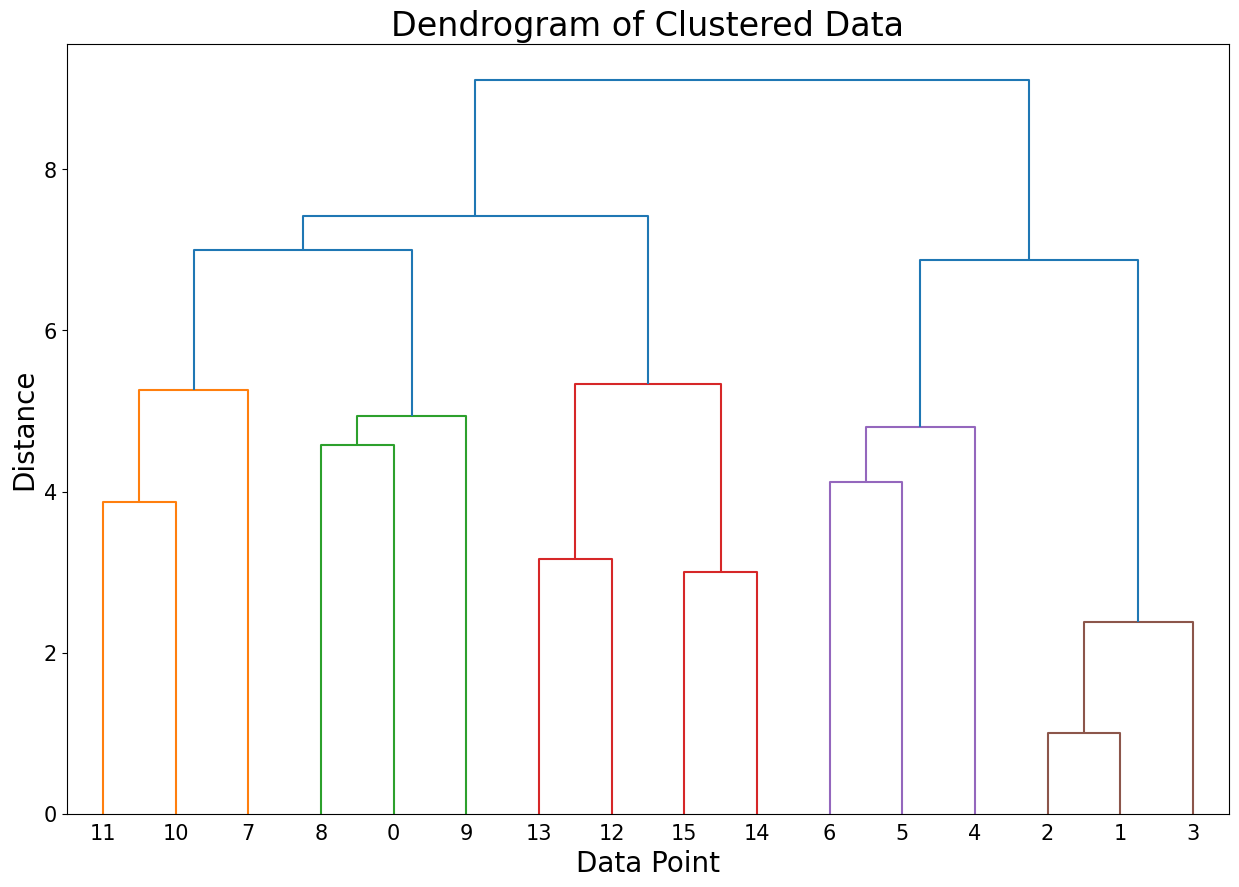

In [48]:
# prompt: NECESITO UN GRAFICO CLUSTERB PARA ALA MATRIZ

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Generate the linkage matrix
linkage_matrix = sch.linkage(sw_traceback, method='ward')

# Create a dendrogram
plt.figure(figsize=(15, 10))
plt.title('Dendrogram of Clustered Data', fontsize=24)
sch.dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.xlabel('Data Point', fontsize=20)
plt.ylabel('Distance', fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()


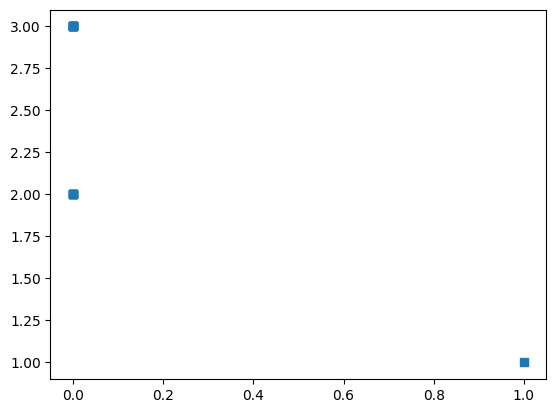

In [49]:
np.genfromtxt=sw_traceback
x = sw_traceback[:,0]
y = sw_traceback[:,1]
plt.plot(x, y, 's');

In [50]:
def assign(sw_traceback, centroids):
    """
    Assign each point in the data set to the closer centroid.

    Parameters
    ----------
    data: Array. data set to clusterize
    centroids. Array. Coordinate of the centroids

    """
    # k clusters
    k = len(centroids)
    # create a list of k lists
    clusters = [[] for _ in range(k)]
    # loop trough all the datapoints and check their
    # distance to each centroid. Add the point to the
    # closer centroid
    for i in data:
        f = []
        for j in centroids:
            #dist = (np.sum((j - i)**2))**0.5
            dist = np.sum((j - i)**2)
            f.append(dist)
        mn = f.index(min(f))
        clusters[mn].append(i)
    return clusters


def k_means(sw_traceback, k):
    """
    Perform the k_means algorithm

    Parameters
    ----------
    data: Array. data set to clusterize
    k. Int. Number of clusters

    """
    # initialize by selecting k data points at random
    centroids = data[np.random.random_integers(len(data)-1, size=k)]
    # use the k data points as the initial centroids
    clusters = assign(data, centroids)
    centroids_old = centroids

    # loop until the clusters stops changing
    while True:
        centroids = []
        for cluster in clusters:
            centroids.append(np.mean(cluster, axis=0))
        centroids = np.array(centroids)
        if np.array_equal(centroids, centroids_old):
            return clusters
        else:
            clusters = assign(sw_traceback, centroids)
            centroids_old = centroids

<ipython-input-50-026e34fd1ee3>:40: DeprecationWarning: This function is deprecated. Please call randint(1, 4 + 1) instead
  centroids = data[np.random.random_integers(len(data)-1, size=k)]


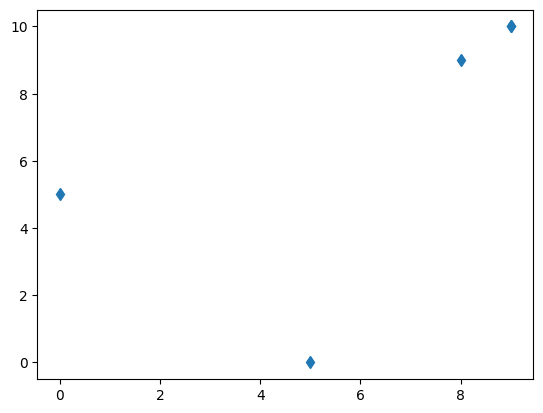

In [51]:
clusters = k_means(sw_traceback, 1)
for i in range(len(clusters)):
    x = np.array(clusters[i])[:,0]
    y = np.array(clusters[i])[:,1]
    plt.plot(x, y, 'd')

In [54]:
def nb_joining(d_mat):
    """
    """

    n = len(d_mat)
    if n == 2:
        #print d_mat
        return d_mat
    # compute the distance from each node to the rest of the nodes
    net_div = np.array([np.sum(d_mat, axis=1)])
    # Compute the Q matrix
    q_mat = (n-2) * d_mat - net_div - net_div.T
    np.fill_diagonal(q_mat, 0)
    #print q_mat
    # compute the indices of the lowest value.
    # argmin flattens the arrays before computing the minimun, unravel_index
    # returns the indeces from the unflatten array
    lw = np.unravel_index(np.argmin(q_mat), np.shape(q_mat))
    #print lw
    # Distance from the pair members to the new node
    d_ij = 0.5 * d_mat[lw] \
    + 1/(2*(n-2)) * (np.sum(d_mat[lw[0]]) - np.sum(d_mat[lw[1]]))
    d_ji = d_mat[lw] - d_ij
    #print d_ij, d_ji
    # Compute a new distance-matrix using the new node
    new_node_d = 0.5 * (d_mat[lw[0]] + d_mat[lw[1]] - d_mat[lw])
    d_mat = np.delete(d_mat, lw, axis=0)
    d_mat = np.delete(d_mat, lw, axis=1)
    new_d_mat = np.zeros((n-1, n-1))
    new_d_mat[0] = new_node_d[1:]
    new_d_mat[:,0] = new_node_d[1:]
    new_d_mat[1:,1:] = d_mat
    #print new_d_mat
    nb_joining(new_d_mat)


nb_joining(dist_matrix)


<ipython-input-65-02e66df2f344>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(new_d_mat, method='ward')


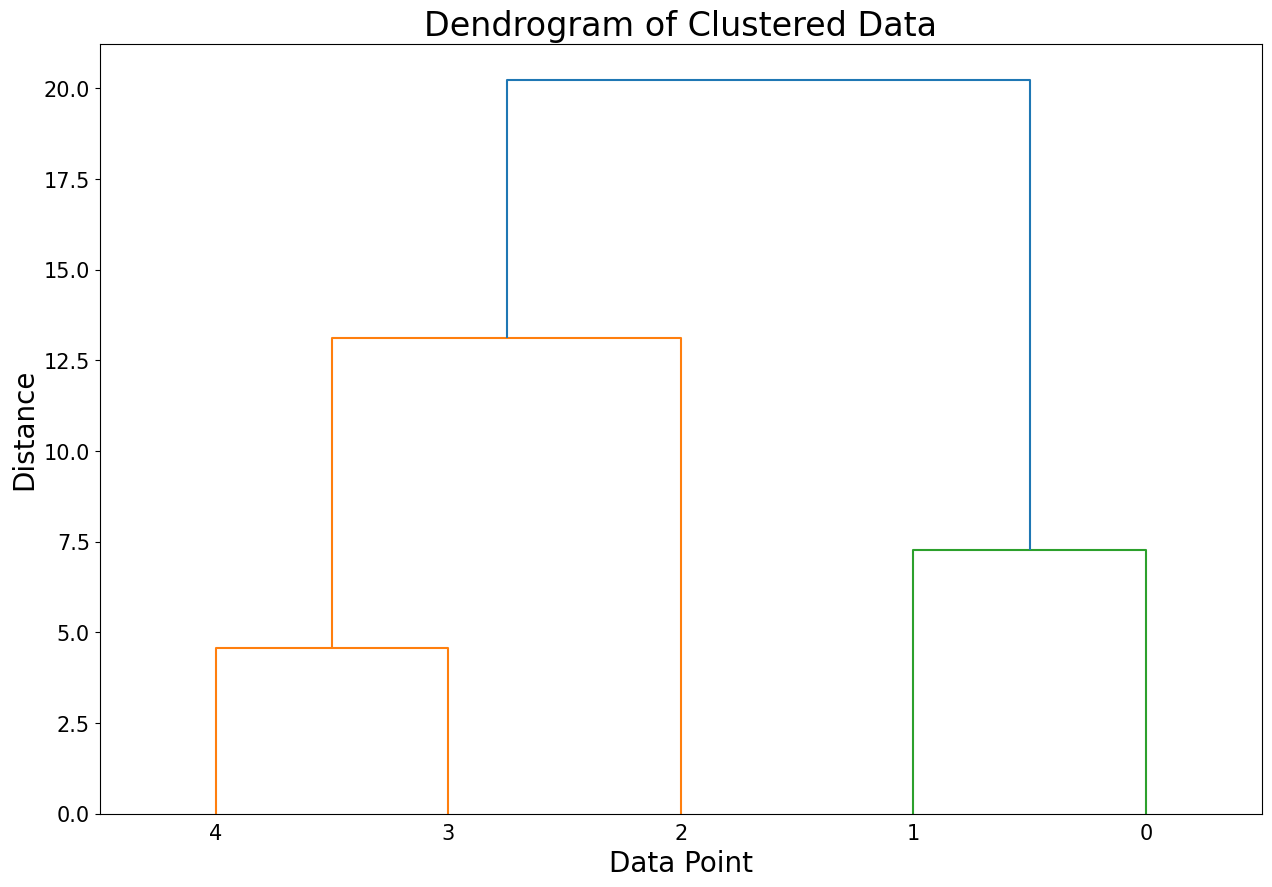

In [65]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Generate the linkage matrix
linkage_matrix = sch.linkage(new_d_mat, method='ward')

# Create a dendrogram
plt.figure(figsize=(15, 10))
plt.title('Dendrogram of Clustered Data', fontsize=24)
sch.dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.xlabel('Data Point', fontsize=20)
plt.ylabel('Distance', fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()

<ipython-input-50-026e34fd1ee3>:40: DeprecationWarning: This function is deprecated. Please call randint(1, 4 + 1) instead
  centroids = data[np.random.random_integers(len(data)-1, size=k)]


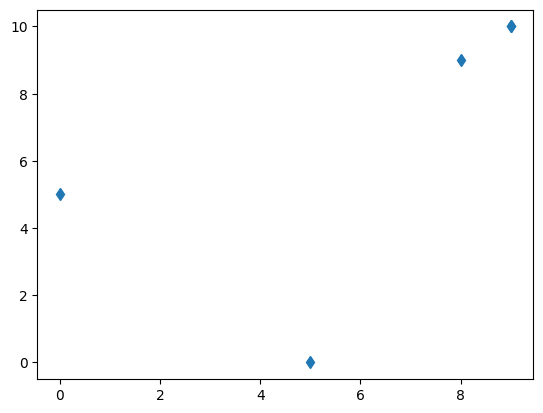

In [70]:
clusters = k_means(new_d_mat, 1)
for i in range(len(clusters)):
    x = np.array(clusters[i])[:,0]
    y = np.array(clusters[i])[:,1]
    plt.plot(x, y, 'd')

A menos que desee tener grupos que contengan partes del círculo interior y exterior, el ejemplo anterior muestra que k-means puede no ser el mejor algoritmo para este conjunto de datos en particular. De hecho, no existe un algoritmo de agrupamiento ideal que funcione para todos los conjuntos de datos posibles. Sin embargo, algunos algoritmos (como DBSCAN) tienen un rendimiento muy bueno en situaciones más diferentes que otros. Como siempre es el caso de cualquier modelo/algoritmo, es importante evaluar el resultado de un algoritmo de agrupamiento en el contexto de una aplicación particular y utilizando el conocimiento del dominio disponible.
Otras lecturas

Henikoff y Henikoff 1992. Matrices de sustitución de aminoácidos a partir de bloques de proteínas. PNAS 89:10915-10919.
Styczynski et al 2008. Los errores de cálculo de BLOSUM62 mejoran el rendimiento de la búsqueda.
Jason Kinser 2009. Python para bioinformática.
Saitou N, Nei M 1987. El método de unión de vecinos: un nuevo método para reconstruir árboles filogenéticos.
Yang 2014. Evolución molecular: un enfoque estadístico.
Clustal. Una familia de algoritmos para el alineamiento de secuencias múltiples.